<a href="https://colab.research.google.com/github/wiss0212/Video_streaming_churn/blob/main/Project_video_streaming.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/wiss0212/Video_streaming_churn.git


Cloning into 'Video_streaming_churn'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (3/3), done.


In [ ]:
import pandas as pd
import numpy as np

# Machine Learning / Classification packages
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
# Visualization Packages
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression



In [ ]:
path_train="/content/drive/MyDrive/data_coursera/Files/Files/home/jovyan/work/train.csv"
train_df=pd.read_csv(path_train)
train_df.head()

,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,...,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,CustomerID,Churn
0,20,11.055215,221.104302,Premium,Mailed check,No,Both,No,Mobile,36.758104,...,10,Sci-Fi,2.176498,4,Male,3,No,No,CB6SXPNVZA,0
1,57,5.175208,294.986882,Basic,Credit card,Yes,Movies,No,Tablet,32.450568,...,18,Action,3.478632,8,Male,23,No,Yes,S7R2G87O09,0
2,73,12.106657,883.785952,Basic,Mailed check,Yes,Movies,No,Computer,7.395160,...,23,Fantasy,4.238824,6,Male,1,Yes,Yes,EASDC20BDT,0
3,32,7.263743,232.439774,Basic,Electronic check,No,TV Shows,No,Tablet,27.960389,...,30,Drama,4.276013,2,Male,24,Yes,Yes,NPF69NT69N,0
4,57,16.953078,966.325422,Premium,Electronic check,Yes,TV Shows,No,TV,20.083397,...,20,Comedy,3.616170,4,Female,0,No,No,4LGYPK7VOL,0


# New Section

In [ ]:
path_test="/content/drive/MyDrive/data_coursera/Files/Files/home/jovyan/work/test.csv"
test_df=pd.read_csv(path_test)
test_df.head()


,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,CustomerID
0,38,17.869374,679.036195,Premium,Mailed check,No,TV Shows,No,TV,29.126308,122.274031,42,Comedy,3.522724,2,Male,23,No,No,O1W6BHP6RM
1,77,9.912854,763.289768,Basic,Electronic check,Yes,TV Shows,No,TV,36.873729,57.093319,43,Action,2.021545,2,Female,22,Yes,No,LFR4X92X8H
2,5,15.019011,75.095057,Standard,Bank transfer,No,TV Shows,Yes,Computer,7.601729,140.414001,14,Sci-Fi,4.806126,2,Female,22,No,Yes,QM5GBIYODA
3,88,15.357406,1351.451692,Standard,Electronic check,No,Both,Yes,Tablet,35.586430,177.002419,14,Comedy,4.943900,0,Female,23,Yes,Yes,D9RXTK2K9F
4,91,12.406033,1128.949004,Standard,Credit card,Yes,TV Shows,Yes,Tablet,23.503651,70.308376,6,Drama,2.846880,6,Female,0,No,No,ENTCCHR1LR


In [ ]:
nan_values = train_df.isna().sum()
print("NaN values count per column:")
print(nan_values)

NaN values count per column:
AccountAge                  0
MonthlyCharges              0
TotalCharges                0
SubscriptionType            0
PaymentMethod               0
PaperlessBilling            0
ContentType                 0
MultiDeviceAccess           0
DeviceRegistered            0
ViewingHoursPerWeek         0
AverageViewingDuration      0
ContentDownloadsPerMonth    0
GenrePreference             0
UserRating                  0
SupportTicketsPerMonth      0
Gender                      0
WatchlistSize               0
ParentalControl             0
SubtitlesEnabled            0
CustomerID                  0
Churn                       0
dtype: int64


In [ ]:
# Check for negative values in the DataFrame
numeric_columns = train_df.select_dtypes(include=['number'])
negative_values_mask = numeric_columns< 0
negative_values_count = negative_values_mask.sum()
print("Columns with negative values and their counts:")
print(negative_values_count[negative_values_count > 0])

Columns with negative values and their counts:
Series([], dtype: int64)


In [ ]:
mean_age = train_df['AccountAge'].mean()
print(mean_age)
empty_values = train_df.isnull().any()
print(empty_values)


60.083757542444836
AccountAge                  False
MonthlyCharges              False
TotalCharges                False
SubscriptionType            False
PaymentMethod               False
PaperlessBilling            False
ContentType                 False
MultiDeviceAccess           False
DeviceRegistered            False
ViewingHoursPerWeek         False
AverageViewingDuration      False
ContentDownloadsPerMonth    False
GenrePreference             False
UserRating                  False
SupportTicketsPerMonth      False
Gender                      False
WatchlistSize               False
ParentalControl             False
SubtitlesEnabled            False
CustomerID                  False
Churn                       False
dtype: bool


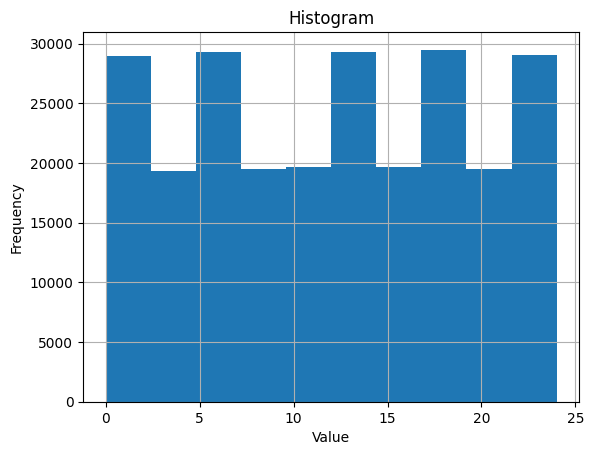

In [ ]:
# Histogram
train_df.hist(['WatchlistSize'])
plt.title('Histogram')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

In [ ]:
X_train = train_df.drop(['Churn','CustomerID'], axis=1)  # Features
X_train

,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled
0,20,11.055215,221.104302,Premium,Mailed check,No,Both,No,Mobile,36.758104,63.531377,10,Sci-Fi,2.176498,4,Male,3,No,No
1,57,5.175208,294.986882,Basic,Credit card,Yes,Movies,No,Tablet,32.450568,25.725595,18,Action,3.478632,8,Male,23,No,Yes
2,73,12.106657,883.785952,Basic,Mailed check,Yes,Movies,No,Computer,7.395160,57.364061,23,Fantasy,4.238824,6,Male,1,Yes,Yes
3,32,7.263743,232.439774,Basic,Electronic check,No,TV Shows,No,Tablet,27.960389,131.537507,30,Drama,4.276013,2,Male,24,Yes,Yes
4,57,16.953078,966.325422,Premium,Electronic check,Yes,TV Shows,No,TV,20.083397,45.356653,20,Comedy,3.616170,4,Female,0,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243782,77,9.639902,742.272460,Basic,Mailed check,No,Movies,No,Computer,13.502729,80.367312,47,Sci-Fi,3.697451,1,Male,8,Yes,No
243783,117,13.049257,1526.763053,Premium,Credit card,No,TV Shows,Yes,TV,24.963291,59.818441,35,Comedy,1.449742,4,Male,20,No,No
243784,113,14.514569,1640.146267,Premium,Credit card,Yes,TV Shows,No,TV,10.628728,176.186095,44,Action,4.012217,6,Male,13,Yes,Yes
243785,7,18.140555,126.983887,Premium,Bank transfer,Yes,TV Shows,No,TV,30.466782,153.386315,36,Fantasy,2.135789,7,Female,5,No,Yes


In [ ]:
Y_train =train_df['Churn'] # targets
Y_train


0         0
1         0
2         0
3         0
4         0
         ..
243782    0
243783    0
243784    0
243785    0
243786    0
Name: Churn, Length: 243787, dtype: int64

In [ ]:
ids=train_df['CustomerID']
ids

0         CB6SXPNVZA
1         S7R2G87O09
2         EASDC20BDT
3         NPF69NT69N
4         4LGYPK7VOL
             ...    
243782    FBZ38J108Z
243783    W4AO1Y6NAI
243784    0H3SWWI7IU
243785    63SJ44RT4A
243786    A6IN701VRY
Name: CustomerID, Length: 243787, dtype: object

In [ ]:
X_test = test_df.drop(('CustomerID'), axis=1)  # Features
X_test

,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled
0,38,17.869374,679.036195,Premium,Mailed check,No,TV Shows,No,TV,29.126308,122.274031,42,Comedy,3.522724,2,Male,23,No,No
1,77,9.912854,763.289768,Basic,Electronic check,Yes,TV Shows,No,TV,36.873729,57.093319,43,Action,2.021545,2,Female,22,Yes,No
2,5,15.019011,75.095057,Standard,Bank transfer,No,TV Shows,Yes,Computer,7.601729,140.414001,14,Sci-Fi,4.806126,2,Female,22,No,Yes
3,88,15.357406,1351.451692,Standard,Electronic check,No,Both,Yes,Tablet,35.586430,177.002419,14,Comedy,4.943900,0,Female,23,Yes,Yes
4,91,12.406033,1128.949004,Standard,Credit card,Yes,TV Shows,Yes,Tablet,23.503651,70.308376,6,Drama,2.846880,6,Female,0,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104475,80,17.348236,1387.858873,Standard,Credit card,No,TV Shows,Yes,Mobile,19.189141,135.445204,35,Comedy,1.411831,7,Female,14,No,Yes
104476,20,8.275459,165.509180,Premium,Bank transfer,Yes,Movies,Yes,Mobile,30.986604,114.868640,17,Drama,2.783849,2,Male,8,Yes,No
104477,106,18.134343,1922.240365,Basic,Mailed check,No,Movies,Yes,Computer,7.236303,109.583153,31,Comedy,2.991527,1,Male,12,No,Yes
104478,46,19.774010,909.604454,Basic,Bank transfer,No,TV Shows,Yes,TV,25.809285,115.153570,1,Drama,4.998019,0,Female,12,Yes,No


In [ ]:
id_test=test_df['CustomerID']
id_test

0         O1W6BHP6RM
1         LFR4X92X8H
2         QM5GBIYODA
3         D9RXTK2K9F
4         ENTCCHR1LR
             ...    
104475    UTKREC613O
104476    MDB4E477PS
104477    IPDIA02ZE1
104478    ITLFTPRJGV
104479    Y204GZY6NE
Name: CustomerID, Length: 104480, dtype: object

In [ ]:
# Encode the 'Category' column
train_columns_category=X_train.select_dtypes(include=['object', 'category']).columns
train_columns_category

Index(['SubscriptionType', 'PaymentMethod', 'PaperlessBilling', 'ContentType',
       'MultiDeviceAccess', 'DeviceRegistered', 'GenrePreference', 'Gender',
       'ParentalControl', 'SubtitlesEnabled'],
      dtype='object')

In [ ]:
X_train_encoded=pd.get_dummies(X_train,columns=train_columns_category)
X_train_encoded

,AccountAge,MonthlyCharges,TotalCharges,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,UserRating,SupportTicketsPerMonth,WatchlistSize,SubscriptionType_Basic,...,GenrePreference_Comedy,GenrePreference_Drama,GenrePreference_Fantasy,GenrePreference_Sci-Fi,Gender_Female,Gender_Male,ParentalControl_No,ParentalControl_Yes,SubtitlesEnabled_No,SubtitlesEnabled_Yes
0,20,11.055215,221.104302,36.758104,63.531377,10,2.176498,4,3,0,...,0,0,0,1,0,1,1,0,1,0
1,57,5.175208,294.986882,32.450568,25.725595,18,3.478632,8,23,1,...,0,0,0,0,0,1,1,0,0,1
2,73,12.106657,883.785952,7.395160,57.364061,23,4.238824,6,1,1,...,0,0,1,0,0,1,0,1,0,1
3,32,7.263743,232.439774,27.960389,131.537507,30,4.276013,2,24,1,...,0,1,0,0,0,1,0,1,0,1
4,57,16.953078,966.325422,20.083397,45.356653,20,3.616170,4,0,0,...,1,0,0,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243782,77,9.639902,742.272460,13.502729,80.367312,47,3.697451,1,8,1,...,0,0,0,1,0,1,0,1,1,0
243783,117,13.049257,1526.763053,24.963291,59.818441,35,1.449742,4,20,0,...,1,0,0,0,0,1,1,0,1,0
243784,113,14.514569,1640.146267,10.628728,176.186095,44,4.012217,6,13,0,...,0,0,0,0,0,1,0,1,0,1
243785,7,18.140555,126.983887,30.466782,153.386315,36,2.135789,7,5,0,...,0,0,1,0,1,0,1,0,0,1


In [ ]:
test_columns_category=X_test.select_dtypes(include=['object', 'category']).columns
test_columns_category

Index(['SubscriptionType', 'PaymentMethod', 'PaperlessBilling', 'ContentType',
       'MultiDeviceAccess', 'DeviceRegistered', 'GenrePreference', 'Gender',
       'ParentalControl', 'SubtitlesEnabled'],
      dtype='object')

In [ ]:
X_test_encoded=pd.get_dummies(X_test,columns=test_columns_category)
X_test_encoded

,AccountAge,MonthlyCharges,TotalCharges,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,UserRating,SupportTicketsPerMonth,WatchlistSize,SubscriptionType_Basic,...,GenrePreference_Comedy,GenrePreference_Drama,GenrePreference_Fantasy,GenrePreference_Sci-Fi,Gender_Female,Gender_Male,ParentalControl_No,ParentalControl_Yes,SubtitlesEnabled_No,SubtitlesEnabled_Yes
0,38,17.869374,679.036195,29.126308,122.274031,42,3.522724,2,23,0,...,1,0,0,0,0,1,1,0,1,0
1,77,9.912854,763.289768,36.873729,57.093319,43,2.021545,2,22,1,...,0,0,0,0,1,0,0,1,1,0
2,5,15.019011,75.095057,7.601729,140.414001,14,4.806126,2,22,0,...,0,0,0,1,1,0,1,0,0,1
3,88,15.357406,1351.451692,35.586430,177.002419,14,4.943900,0,23,0,...,1,0,0,0,1,0,0,1,0,1
4,91,12.406033,1128.949004,23.503651,70.308376,6,2.846880,6,0,0,...,0,1,0,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104475,80,17.348236,1387.858873,19.189141,135.445204,35,1.411831,7,14,0,...,1,0,0,0,1,0,1,0,0,1
104476,20,8.275459,165.509180,30.986604,114.868640,17,2.783849,2,8,0,...,0,1,0,0,0,1,0,1,1,0
104477,106,18.134343,1922.240365,7.236303,109.583153,31,2.991527,1,12,1,...,1,0,0,0,0,1,1,0,0,1
104478,46,19.774010,909.604454,25.809285,115.153570,1,4.998019,0,12,1,...,0,1,0,0,1,0,0,1,1,0


In [ ]:
x_train, x_val, y_train, y_val = train_test_split(X_train_encoded,Y_train , test_size=0.2, random_state=42)

In [ ]:
rf_classifier = RandomForestClassifier(random_state=42)
# Distribution d'hyperparamètres à tester
param_distributions = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10, 15]
}

# Configuration de RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf_classifier, param_distributions=param_distributions, n_iter=100, cv=5, scoring='accuracy', random_state=42)




In [ ]:
rf_classifier = RandomForestClassifier(n_estimators=500, max_depth=30, random_state=42)

In [ ]:
rf_classifier.fit(x_train, y_train)


RandomForestClassifier(max_depth=30, n_estimators=500, random_state=42)

In [ ]:
logistic_reg = LogisticRegression()

In [ ]:
logistic_reg.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_prob=logistic_reg.predict_proba(x_val)[:,1]

In [ ]:
roc_auc=roc_auc_score(y_val,y_prob)
print(f"ROC-AUC Score: {roc_auc}")

ROC-AUC Score: 0.7525279580888828
